<a href="https://colab.research.google.com/github/dajuctech/Applied-AI-Course/blob/main/Image%20Processing/Image_Manipulation_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation - Part 2

This notebook contains the practical examples and exercises for the Applied AI-Image Processing.

*Created by Hansi Hettiarachchi*

# Drive and File Setup

You can find more details about this step in **Image Manipulation - Part 1** notebook.

In [1]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')

# unzip file
import shutil
#shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')
shutil.unpack_archive('sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')

## Accessing Data

In [4]:
import os  # to handle file paths

Let's define a variable that holds the path to the data folder so we can reuse it without rewriting this long path.

<font color='red'>Note: Please make sure to update the following path with where your sample_images folder is located.</font>

In [8]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images'

We can use **os module/library in Python** to get paths to separate files within the data folder, as shown below.

In [9]:
# paths of separate files in a folder
print(os.path.join(data_folder, 'mickey_mouse.jpg'))

/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images/mickey_mouse.jpg


# Image Manipulation Techniques

In [10]:
import cv2  # opencv-python

import matplotlib.pyplot as plt
import numpy as np

import os

## Resizing

Image resizing refers to either enlarging or shrinking images and it is mainly done using interpolation.

Commonly used interpolation algorithms are
1. Nearest neighbour interpolation,
2. Biliniear interpolation, and
3. Bicubic interpolation.

More details about <i>resize</i> function is avaialble [here](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) including its default setting and supported interpolation methods.

Let's enlarge the mickey mouse image with a scale ratio of 2, using all three methods mentioned above.

In [12]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

In [13]:
scale_ratio = 2

# define new dimensions
width = int(img.shape[1] * scale_ratio)
height = int(img.shape[0] * scale_ratio)
dim = (width, height)

print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (170, 278)


### 1. Nearest Neighbour Interpolation

height, width, channels: (278, 170, 3)


True

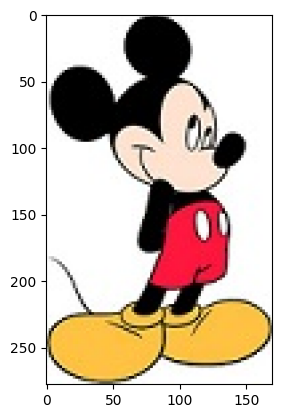

In [14]:
# resize using nearest neighbor interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_NEAREST)

# print new image dimensions afte resizing
print(f'height, width, channels: {img_resized.shape}')

# show resized image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

# save resized image
cv2.imwrite("/content/mickey_mouse-enlarged-nni.jpg", img_resized)

### 2. Bilinear Interpolation

height, width, channels: (278, 170, 3)


True

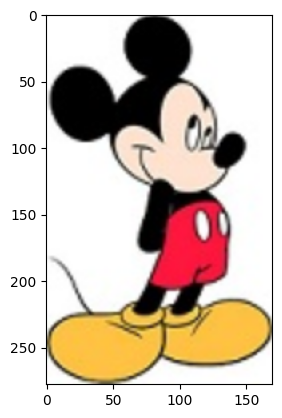

In [15]:
# resize using bilinear interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# print new image dimensions afte resizing
print(f'height, width, channels: {img_resized.shape}')

# show resized image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

# save resized image
cv2.imwrite("/content/mickey_mouse-enlarged-bli.jpg", img_resized)

### 3. Bicubic Interpolation

height, width, channels: (278, 170, 3)


True

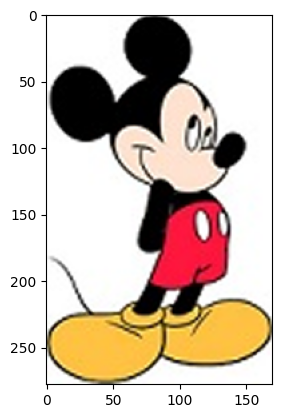

In [16]:
# resize using bicubic interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)

# print new image dimensions afte resizing
print(f'height, width, channels: {img_resized.shape}')

# show resized image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

# save resized image
cv2.imwrite("/content/mickey_mouse-enlarged-bci.jpg", img_resized)

### <font color='green'>**Activity 1**</font>

Download the images you saved in the above three steps: (1) Nearest Neighbour Interpolation, (2) Bilinear Interpolation and (3) Bicubic Interpolation.

Compare them and recognise which resized image has the highest quality.

Bicubic image is more clearer than the two other images

### Image Shrinking

Let's shrink the mickey mouse image with a scale ratio of 2.

As suggested in the function [documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), to shrink an image, it will generally look best with INTER_AREA interpolation.

In [17]:
scale_ratio = 2

# define new dimensions
width = int(img.shape[1] / scale_ratio)
height = int(img.shape[0] / scale_ratio)
dim = (width, height)

print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (42, 69)


height, width, channels: (69, 42, 3)


True

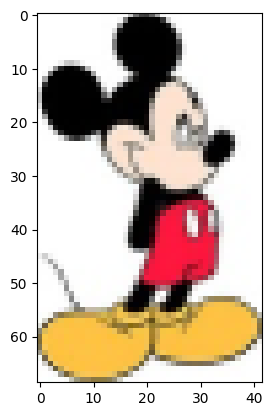

In [18]:
# shrink image
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# print new image dimensions afte resizing
print(f'height, width, channels: {img_resized.shape}')

# show resized image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

# save resized image
cv2.imwrite("/content/mickey_mouse-shrinked-nni.jpg", img_resized)

## Blurring/ Smoothing

Image blurring can be done by convolving the image with a low-pass filter kernel.

Commonly used techniques are
1. Box filtering, and
2. Gaussian filtering.

Refer to this [tutorial](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) for more details.

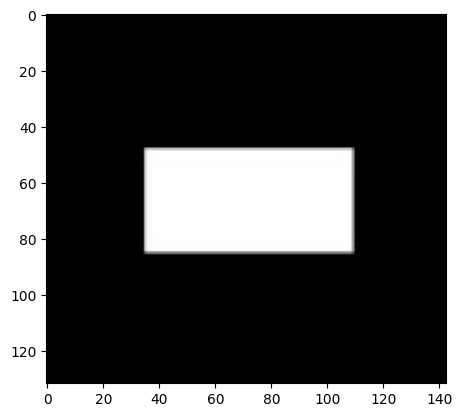

In [19]:
# load image
img = cv2.imread(os.path.join(data_folder, 'white_box.jpg'))

# show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 1. Box Filtering

True

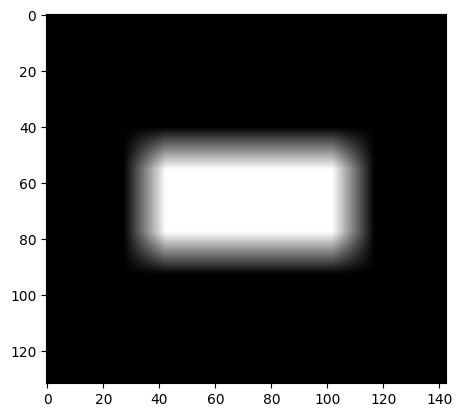

In [20]:
# image blurring using box filtering
img_blurred = cv2.blur(img, (15,15))

# show blurred image
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

# save blurred image
cv2.imwrite("/content/white_box-blurred-bf.jpg", img_blurred)

### 2. Gaussian Filtering

Unlike the box filter, <i>GaussianBlur</i> requires an additional parameter, **sigma**.
More details about parameters can be found [here](https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/).

True

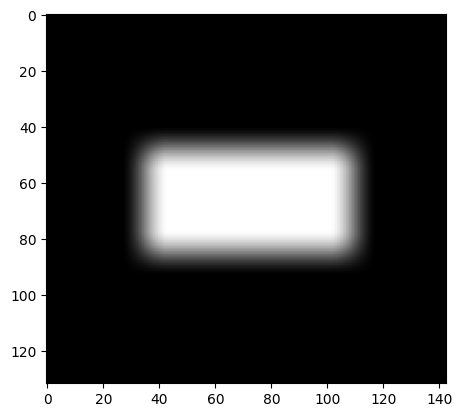

In [21]:
# image blurring using Gaussian filtering
img_blurred = cv2.GaussianBlur(img, (15,15), 5)

# show blurred image
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

# save blurred image
cv2.imwrite("/content/white_box-blurred-gf.jpg", img_blurred)

### <font color='green'>**Activity 2**</font>

a) Compare the output of Box Filtering and Gaussian Filtering. What are the differences you noticed?

b) Change the sigma value of the Gaussian filter and see its impact on the final image.

## Histogram Equalisation

Histogram equalisation is an image processing technique that spreads out the most frequent pixel intensity values or stretches the histogram to either end to enhance the image’s contrast.

Refer to this [tutorial](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html) for more details.

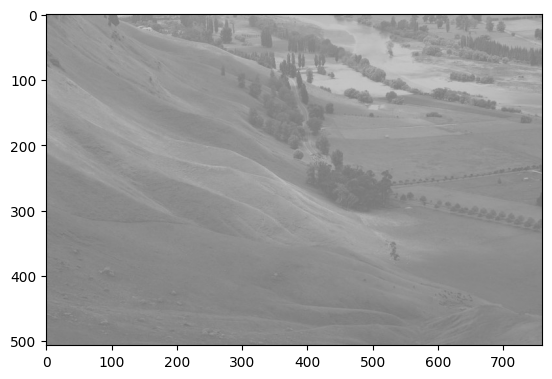

In [ ]:
# load image
img = cv2.imread(os.path.join(data_folder, 'valley.jpg'))

# show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
print(f'{img.shape}')

(507, 760, 3)


As can be seen in the above dimensions, this image is a colour image.

Thus, we need to first convert the image into a grayscale image because the OpenCV function only supports grayscale images.

In [ ]:
# image need to be grayscaled before input to equalizeHist
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# save image
print(f'{img_grayscaled.shape}\n')

(507, 760)



True

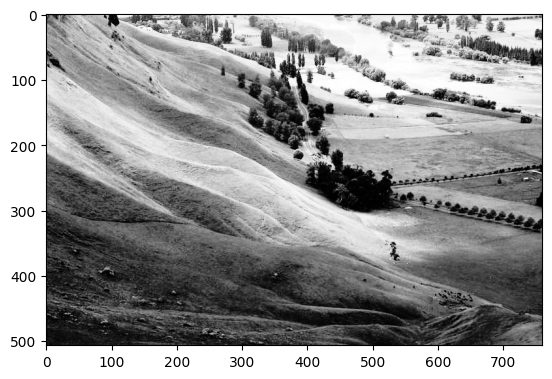

In [ ]:
# apply histogram equalisation
img_hist = cv2.equalizeHist(img_grayscaled)

# show histogram equalised image
plt.imshow(cv2.cvtColor(img_hist, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/valley-histequalised.jpg", img_hist)

### <font color='green'>**Activity 3**</font>

Follow this [tutorial](https://www.freedomvc.com/index.php/2021/09/11/color-image-histograms/) to understand how OpenCV's equalizeHist function can be adapted to equalise a colour image.

Apply histogram equalisation to scenery.jpg in sample_images folder using the approach explained in the tutorial.

## Translation

Translation is moving the image along X, Y or both directions.

Refer this [turorial](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html) for more detals.

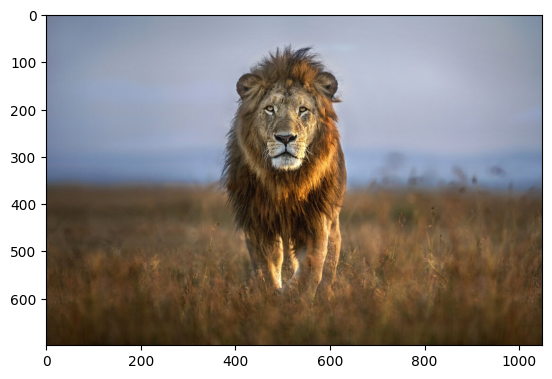

In [ ]:
# load image
img = cv2.imread(os.path.join(data_folder, 'lion.jpg'))

# show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

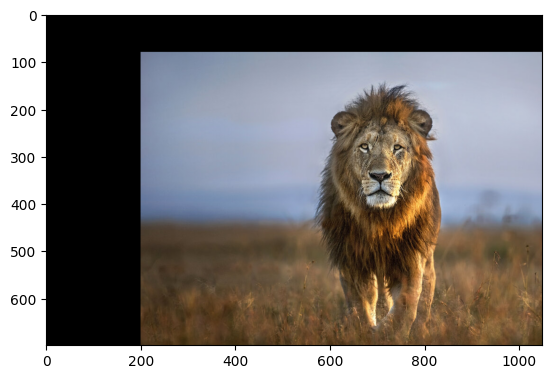

In [ ]:
# define the transformation matrix for shift (20,50) - 200 columns and 80 rows
m = np.float32([[1,0,200],[0,1,80]])

# get image dimensions
width = img.shape[1]
height = img.shape[0]
dim = (width, height)

# translate image
img_translated = cv2.warpAffine(img, m, dim)

# show translated image
plt.imshow(cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB))

### <font color='green'>**Activity 4**</font>

Considering the above translation example, discuss a situation where translation is important.